In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import urllib.request # module for downloading data from URLs

## USEFUL STATISTICAL PLOTS FOR EXPLORATORY DATA ANALYSIS!
- **Reminder: goals of EDA**: initial exploration of your data that helps you frame a smart scientific question
    - characteristics
    - relationships
    - patterns 
<br><br>
- **This lesson**:
  - **correlation** coefficients - single # representation of relationship 
  - **heatmaps** - visual representation of correlation coefficients (or other quantities)
  - **scatterplot matrices** - visual representation of relationship
  - **numerical statistical summaries + statistical visualizations are both important**

## INTRO TO SEABORN PACKAGE
- package for attractive, meaningful statistical visualizations
<br><br>
- interfaces with Matplotlib
<br><br>
- works very well with Pandas
<br><br>
- **examples relevant to this class**:
  - heatmaps
  - scatterplots
  - error bars - later

## CORRELATION COEFFICIENTS
 - options for calculating these include:
   - (1) **built-in Pandas**: df.corr() 
      - correlation between each pair of columns in Pandas dataframe
      - defaults to Pearson's 
   - (2) **built-in Xarray**: xr.corr(da1, da2, dim=shared_dim)
      - Pearson's correlation coefficient between two data array objects along shared dimension 
   - (3) **scipy.stats functions**: stats.pearsonr(x, y) 
      - Pearson's correlation coefficient for two variables x and y
<br><br>
- there are other types of correlation coefficients - stay tuned soon-ish for formal conceptual lessons!
- Pearson's is reasonable to start with in many applications

## HEATMAPS
- recall that heatmaps are very useful color-coded visualizations of patterns and relationships
<br><br>
*this example*
- here we'll walk through making a heatmap of the correlation coefficient matrix
- for some interesting characteristics of cars -i.e., we're going to ~create the heatmap you saw in an earlier lesson in this course
- (I have limited number of simple geoscience data sets, aka)

In [2]:
filename = 'Auto.csv'
url = 'http://rfd.atmos.uiuc.edu/Atms517/week7/'+filename

# Downloads what is at the address passed in as 'url' and saves as 'filename'
urllib.request.urlretrieve(url, filename)

('Auto.csv', <http.client.HTTPMessage at 0x265db398d88>)

In [3]:
# Only consider a few variables!
data = pd.read_csv('Auto.csv')
print(data)

      mpg  cylinders  horsepwr  weight  accel_time  year
0    18.0          8       130    3504        12.0    70
1    15.0          8       165    3693        11.5    70
2    18.0          8       150    3436        11.0    70
3    16.0          8       150    3433        12.0    70
4    17.0          8       140    3449        10.5    70
..    ...        ...       ...     ...         ...   ...
387  27.0          4        86    2790        15.6    82
388  44.0          4        52    2130        24.6    82
389  32.0          4        84    2295        11.6    82
390  28.0          4        79    2625        18.6    82
391  31.0          4        82    2720        19.4    82

[392 rows x 6 columns]


(1) Calculate the correlations between each column in your Pandas data structure!
  - Result is correlation matrix

In [4]:
# Computers pairwise correlation of columns!
car_corr = data.corr() 
print(car_corr.shape)

(6, 6)


(2) Mask out the upper portion of the matrix since it's redundant 
  - np.triu & np.ones_like used as such create a mask where the upper triangle of elements is True and lower triangle, False

In [5]:
# Create a mask that we will use to mask out the upper triangle 
                                         # Specifies a boolean data type
mask = np.triu(np.ones_like(car_corr, dtype=bool))
print(mask)

[[ True  True  True  True  True  True]
 [False  True  True  True  True  True]
 [False False  True  True  True  True]
 [False False False  True  True  True]
 [False False False False  True  True]
 [False False False False False  True]]


(3)  Plot the heatmap using the heatmap function in seaborn

<AxesSubplot:>

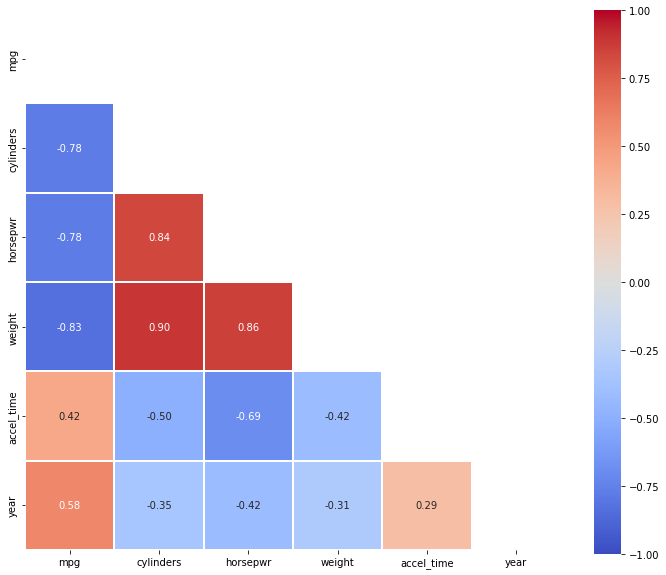

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))

cmap = 'coolwarm' # this particular colormap really makes strong positive or negative correlations pop!

# (1) Masks out any elements with mask = True - so the upper triange
# (2) Include value of, here, correlation coefficient, on each square
# (3) Maximum and minimum values to plot - obviously we want -1 to 1
# (4) Space (line) separating the squares 

                       # (1)       (2)            # two digits after decimal point
sb.heatmap(car_corr, mask=mask,annot=True, fmt=".2f", 
          cmap=cmap, vmin=-1, vmax=1, # (3) 
           square=True,linewidth=1)  # (4)

## SCATTERPLOT MATRIX 
- efficient way to visualize relationships between all pairs of your variables (columns)
- plots along the diagonal are the histogram of the data in each column

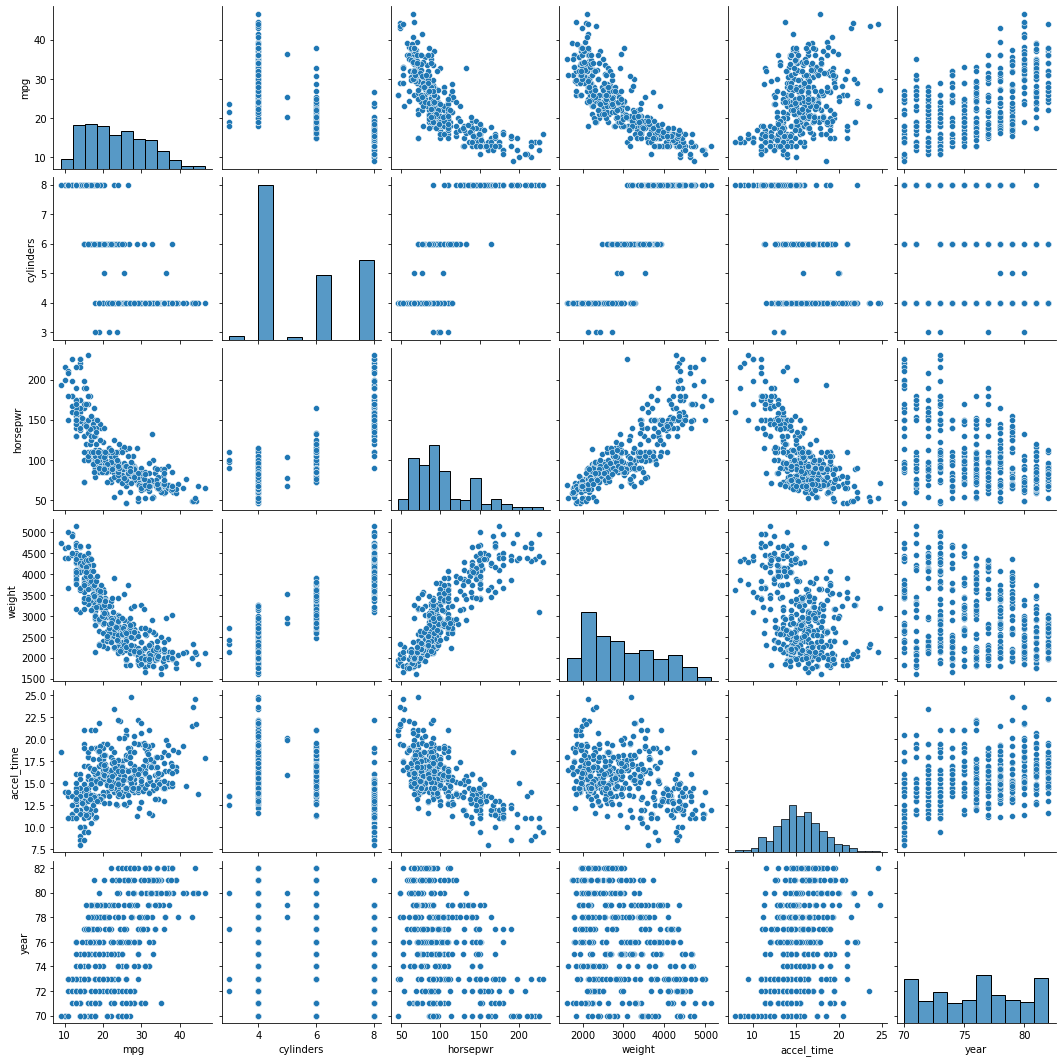

In [7]:
sb.pairplot(data)

### THINGS TO LOOK FOR WHEN VISUALLY IDENTIFYING RELATIONSHIPS
IS THE RELATIONSHIP:
- linear or non-linear?
- monotonic (always increasing or decreasing)?
- positive or negative?

ARE THERE OUTLIERS THAT MIGHT AFFECT THE RELATIONSHIP?

In [3]:
import pandas as pd
import numpy as np
rng = np.random.RandomState(42)

In [9]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,7,2
1,1,11


In [10]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,5,1,4
1,0,9,5
2,8,0,9


In [12]:
A.stack()

0  A     7
   B     2
1  A     1
   B    11
dtype: int64

In [11]:
fill = A.stack().mean()
fill

5.25

In [8]:
A.add(B, fill_value=fill)

,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25
